In [9]:
#import gym
import gymnasium as gym
import xmagical
import warnings

warnings.filterwarnings("ignore")

In [2]:
xmagical.register_envs()

True

In [3]:
xmagical.ALL_REGISTERED_ENVS

['SweepToTop-Gripper-Pixels-Allo-Demo-v0',
 'SweepToTop-Gripper-Pixels-Ego-Demo-v0',
 'SweepToTop-Gripper-State-Allo-Demo-v0',
 'SweepToTop-Gripper-State-Ego-Demo-v0',
 'SweepToTop-Gripper-Pixels-Allo-TestLayout-v0',
 'SweepToTop-Gripper-Pixels-Ego-TestLayout-v0',
 'SweepToTop-Gripper-State-Allo-TestLayout-v0',
 'SweepToTop-Gripper-State-Ego-TestLayout-v0',
 'SweepToTop-Gripper-Pixels-Allo-TestShape-v0',
 'SweepToTop-Gripper-Pixels-Ego-TestShape-v0',
 'SweepToTop-Gripper-State-Allo-TestShape-v0',
 'SweepToTop-Gripper-State-Ego-TestShape-v0',
 'SweepToTop-Gripper-Pixels-Allo-TestColor-v0',
 'SweepToTop-Gripper-Pixels-Ego-TestColor-v0',
 'SweepToTop-Gripper-State-Allo-TestColor-v0',
 'SweepToTop-Gripper-State-Ego-TestColor-v0',
 'SweepToTop-Gripper-Pixels-Allo-TestDynamics-v0',
 'SweepToTop-Gripper-Pixels-Ego-TestDynamics-v0',
 'SweepToTop-Gripper-State-Allo-TestDynamics-v0',
 'SweepToTop-Gripper-State-Ego-TestDynamics-v0',
 'SweepToTop-Gripper-Pixels-Allo-TestAll-v0',
 'SweepToTop-Gripp

In [4]:
env = gym.make('SweepToTop-Longstick-State-Allo-Demo-v0', disable_env_checker =True) #
obs = env.reset()


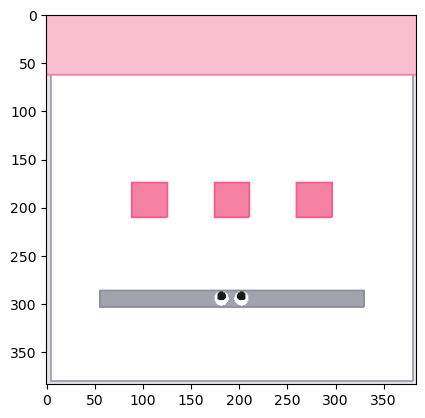

In [5]:
import matplotlib.pyplot as plt

plt.imshow(env.render("rgb_array"))

In [8]:
import sys
sys.path.append("/home/m_bobrin/CILOT-Research")

from video import VideoRecorder

vid = VideoRecorder("/home/m_bobrin/CILOT-Research/research/noteboooks")
vid.init(enabled=True)

In [9]:
import numpy as np
import json

actions_gripper = np.asarray(json.load(open('/home/m_bobrin/CILOT-Research/x_magical_datasets/xmagical/train/longstick/0/actions.json', 'r')))
actions_gripper

array([[-0.29850915, -0.32876673],
       [-0.31957802, -0.34498873],
       [-0.5242824 , -0.28172266],
       [-0.48426369,  0.3562108 ],
       [-0.22365993, -0.09843649],
       [ 0.14741829, -0.86907375],
       [ 0.12207146, -0.93190533],
       [ 0.16009319, -0.88167036],
       [ 0.17973328, -0.81451344],
       [ 0.18559605, -0.73446369],
       [ 0.18055508, -0.6309278 ],
       [ 0.19181849, -0.49659958],
       [ 0.15181327, -0.31173387],
       [ 0.10351796, -0.13214797],
       [ 0.11306649,  0.01314459],
       [ 0.25272855, -0.01365443],
       [ 0.38610402,  0.01638232],
       [ 0.51775289,  0.24737085],
       [ 0.84461248,  0.21305555],
       [ 0.97246832,  0.5000723 ],
       [ 0.99553102,  0.89426011],
       [ 0.99500066,  0.87107462],
       [ 0.92803371,  0.64432633],
       [ 0.30601886, -0.65350223],
       [ 0.58062059, -0.97784817],
       [ 0.72832084, -0.89968479],
       [ 0.54572695, -0.75289446],
       [ 0.27971962, -0.88438028],
       [ 0.42941797,

In [10]:
env.reset()
i = 0
for en in range(50):
    #observation, done = env.reset(), False
    observation, _, done, info = env.step(actions_gripper[i])
    i += 1
    vid.record(env)
    if done:
        env.reset()
        i = 0
        done = False

In [11]:
from gymnasium.utils.save_video import save_video

save_video(
         vid.frames,
         "videos",
         fps=10,
      )

Moviepy - Building video /home/m_bobrin/CILOT-Research/research/noteboooks/videos/rl-video-episode-0.mp4.
Moviepy - Writing video /home/m_bobrin/CILOT-Research/research/noteboooks/videos/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/m_bobrin/CILOT-Research/research/noteboooks/videos/rl-video-episode-0.mp4
